In [42]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [43]:
# Carregamento do dataset
data = pd.read_csv('../Data/earthquake_alert_balanced_dataset.csv')
df = pd.DataFrame(data)

# Exibição das primeiras linhas do dataset
print(df.head())
print(df.info())

   magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None


In [44]:
# Transformação da coluna 'alert' em valores numéricos
label_encoder = LabelEncoder()
df['alert'] = label_encoder.fit_transform(df['alert'])

In [45]:
# Seleção das características e rótulo
X = df.drop('alert', axis=1)
y = df['alert']

# Divizão do dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [46]:
# Normalização dos dados
scaler = StandardScaler()
print(f'X_train antes do escalonamento: \n{X_train[:3]}')
X_train = scaler.fit_transform(X_train)
print(f'\nX_train depois do escalonamento: \n{X_train[:3]}')
X_test = scaler.transform(X_test)

X_train antes do escalonamento: 
     magnitude  depth  cdi  mmi   sig
231        6.8   42.0  3.0  6.0 -52.0
335        6.5   10.0  7.0  5.0 -74.0
302        7.8    8.0  8.0  9.0   4.0

X_train depois do escalonamento: 
[[-0.63024867 -0.0946184  -1.77310609 -0.67934126 -0.6989535 ]
 [-1.34782553 -0.38970793  0.01158332 -1.41376425 -1.05500506]
 [ 1.76167418 -0.40815103  0.45775567  1.5239277   0.20735958]]


In [47]:
#  Treino do KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# Avaliação do KNN
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        65
           1       0.81      0.85      0.83        65
           2       0.86      0.95      0.91        65
           3       0.78      0.78      0.78        65

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260

KNN Confusion Matrix:
[[50  3  2 10]
 [ 2 55  5  3]
 [ 0  2 62  1]
 [ 3  8  3 51]]


In [49]:
# Treino do SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
# Avaliação do SVM
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.62      0.37      0.46        65
           2       0.68      0.80      0.74        65
           3       0.52      0.71      0.60        65

    accuracy                           0.67       260
   macro avg       0.68      0.67      0.66       260
weighted avg       0.68      0.67      0.66       260

SVM Confusion Matrix:
[[52  1  1 11]
 [ 0 24 16 25]
 [ 0  7 52  6]
 [ 5  7  7 46]]


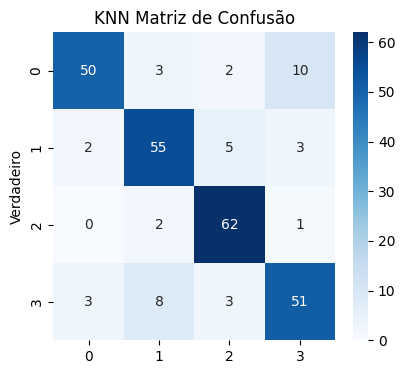

In [51]:
# Visualizar a matriz de confusão para KNN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Matriz de Confusão')
plt.ylabel('Verdadeiro') 
plt.show() 

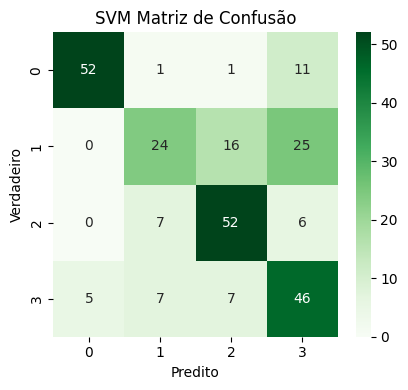

In [52]:
# Visualizar a matriz de confusão para SVM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()